<a href="https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/05%20macroeconomics%20-%20inflation%20rates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

You can run the code examples in [Google Colab](https://colab.research.google.com/github/mbk-dev/okama/blob/master/examples/05%20investment%20portfolios.ipynb).

**To install the package:**

In [ ]:
!pip install okama

import okama and matplotlib packages ...

In [ ]:
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import matplotlib.pyplot as plt

import okama as ok

plt.rcParams["figure.figsize"] = [12.0, 6.0]

`okama` has class and methods to get information and study the macroeconomic data.

## Inflation

`ok.Inflation` class is designed to get the inflation statistics for several currencies (USD, EUR, CNY etc).

In [2]:
ok.symbols_in_namespace("INFL")  # the list of available inflation data series

,symbol,ticker,name,country,exchange,currency,type,isin
0,CNY.INFL,CNY.INFL,China Inflation Rate,China,INFL,CNY,inflation,
1,EUR.INFL,EUR.INFL,EU Inflation Rate,EU,INFL,EUR,inflation,
2,GBP.INFL,GBP.INFL,UK Inflation Rate,UK,INFL,GBP,inflation,
3,ILS.INFL,ILS.INFL,Israel Inflation Rate,Israel,INFL,ILS,inflation,
4,RUB.INFL,RUB.INFL,Russia Inflation Rate,Russia,INFL,RUB,inflation,
5,USD.INFL,USD.INFL,US Inflation Rate,USA,INFL,USD,inflation,


In [3]:
us_inf = ok.Inflation("USD.INFL", first_date="1913-01", last_date="2024-01")  # US dollar inflation
us_inf

symbol                      USD.INFL
name               US Inflation Rate
country                          USA
currency                         USD
type                       inflation
first date                   1913-02
last date                    2024-01
period length    111 years, 0 months
dtype: object

### Plopular inflation charts

12-months rolling inflation time series is available by `rolling_inflation` property.

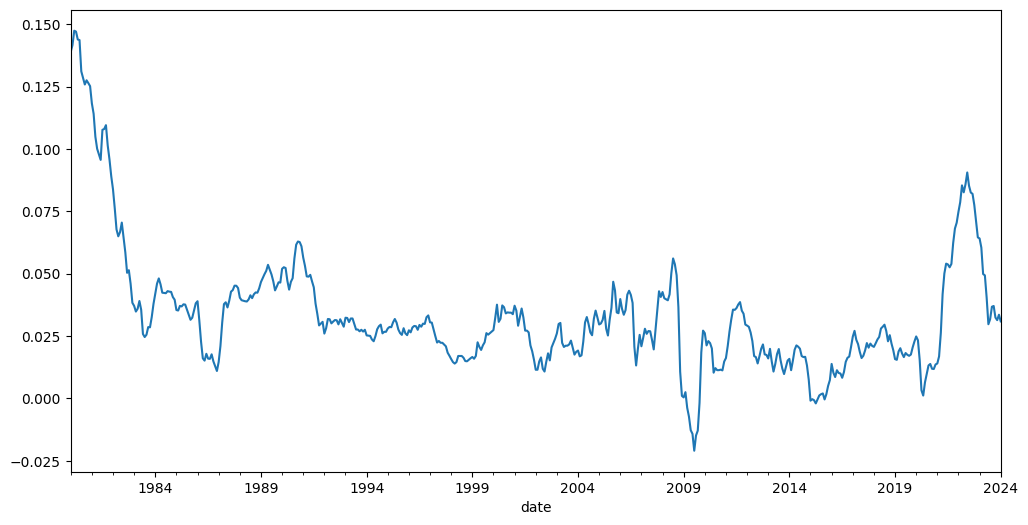

In [4]:
us_inf.rolling_inflation["1980":].plot();  # plot US 12-months inflation (CPI)

`cumulative_inflation` shows cumulative inflation expanding time series for the whole period.

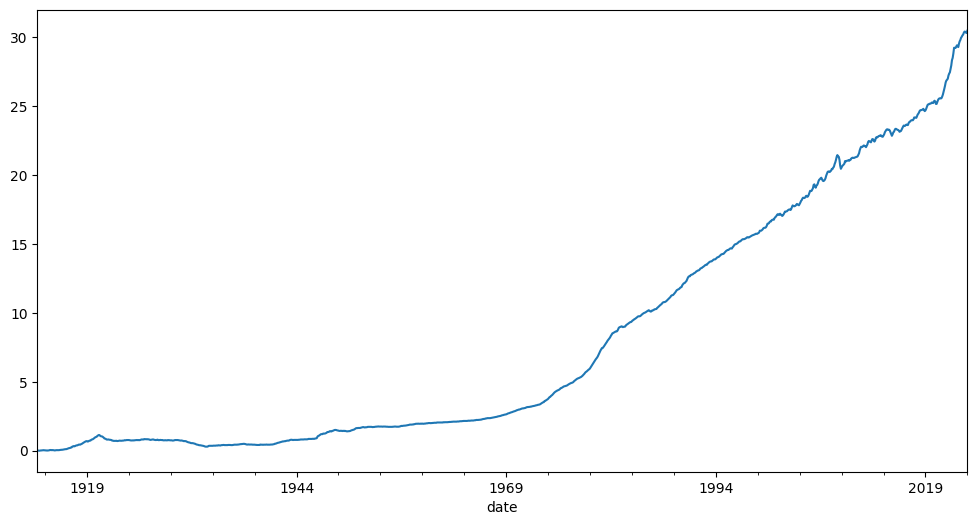

In [5]:
us_inf.cumulative_inflation.plot();

Annual (calendar year) inflation is a popular macro metrics. And it's available with `annual_inflation_ts` property.

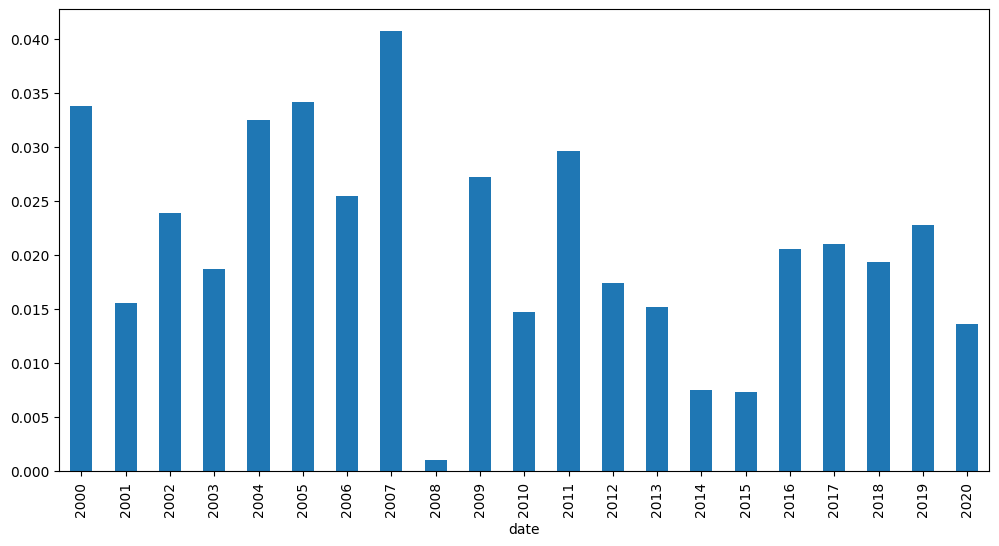

In [6]:
us_inf.annual_inflation_ts["2000":"2020"].plot(kind="bar");

Simple script to plot several 12-month inflation time series in the same chart:

In [7]:
def plot_inflation_list(ccy_list: list, first_date, last_date):
    """
    Plot 12-month rolling inflation for several countries.
    """
    import pandas as pd

    fig, ax = plt.subplots(figsize=[12.0, 8.0])
    date1 = pd.to_datetime(first_date)
    date2 = pd.to_datetime(last_date)

    for i, ccy in enumerate(ccy_list):
        infl_obj = ok.Inflation(ccy)
        if i == 0:
            infl_df = infl_obj.rolling_inflation[str(date1) :] * 100
        else:
            infl = infl_obj.rolling_inflation[str(date1) :] * 100
            infl_df = pd.concat([infl_df, infl], axis=1, join="inner").dropna()

    for infl_symbol in infl_df.columns:
        ticker = infl_symbol.split(".", 1)[0]
        ax.plot(
            infl_df[infl_symbol].index.to_timestamp(), infl_df[infl_symbol], linewidth=2, label=f"Inflation {ticker}"
        )
    infl_df = infl_df.loc[first_date:last_date, :]
    max = infl_df.stack().max()
    min = infl_df.stack().min()
    ax.set_ylim(min, max)
    ax.set_xlim(date1, date2 + pd.Timedelta(30, unit="d"))
    ax.legend(loc="upper right")

In [8]:
infl_symbols = list(ok.symbols_in_namespace("INFL").loc[:, "symbol"])
infl_symbols

['CNY.INFL', 'EUR.INFL', 'GBP.INFL', 'ILS.INFL', 'RUB.INFL', 'USD.INFL']

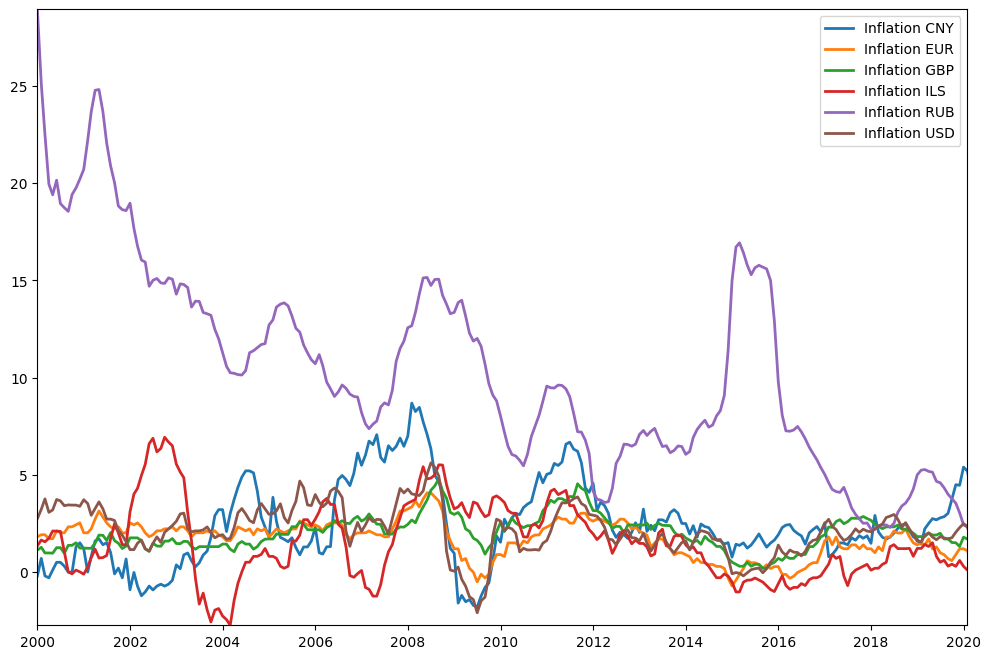

In [9]:
plot_inflation_list(ccy_list=infl_symbols, first_date="2000-01", last_date="2020-01")

### Purchasing power

Currency purchasing power changes with the inflation.
`purchasing_power_1000` property shows the purchasing power of 1000 (in the currency of inflation) after period from first_date to last_date.

The purchasing power of 1000 EUR after 20 years period:

In [10]:
ok.Inflation("EUR.INFL", first_date="2000-01", last_date="2020-01").purchasing_power_1000

np.float64(721.4920719268832)

The same for British pound:

In [11]:
ok.Inflation("GBP.INFL", first_date="2000-01", last_date="2020-01").purchasing_power_1000

np.float64(675.0669608799792)

... and for yuan (CNY):

In [12]:
ok.Inflation("CNY.INFL", first_date="2000-01", last_date="2020-01").purchasing_power_1000

np.float64(594.5471276070163)

### Set Inflation values

Inflation monthly statistics is available with `values_monthly` property.

In [13]:
ru_inf = ok.Inflation("RUB.INFL", first_date="2000-01", last_date="2020-01")  # Russian rubl inflation

In [14]:
ru_inf.values_monthly.tail()  # historical monthly data

date
2019-09   -0.0016
2019-10    0.0013
2019-11    0.0028
2019-12    0.0036
2020-01    0.0040
Freq: M, Name: RUB.INFL, dtype: float64

It's possible to set monthly inflation value for the past or future date. The result stored only in the class instance. It can be used to analyze inflation with forecast or corrected data.

In [15]:
ru_inf.set_values_monthly(date="2020-02", value=0.006)

In [16]:
ru_inf.values_monthly.tail()  # February inflation value is now in statistics

date
2019-10    0.0013
2019-11    0.0028
2019-12    0.0036
2020-01    0.0040
2020-02    0.0060
Freq: M, Name: RUB.INFL, dtype: float64

### Descriptive inflation statistics

Descriptive inflation statistics is available with `describe()` method.
Statistics includes:
- YTD compound inflation
- Annual inflation (geometric mean) for a given list of periods
- max 12 months inflation for the periods
- Annual inflation (geometric mean) for the whole history

In [17]:
isr_inf = ok.Inflation("ILS.INFL")  # Israeli shekel inflation
isr_inf

symbol                        ILS.INFL
name             Israel Inflation Rate
country                         Israel
currency                           ILS
type                         inflation
first date                     1951-10
last date                      2025-02
period length       73 years, 5 months
dtype: object

In [18]:
isr_inf.describe([5, 10, 20])  # statistics for 5, 10 and 20 years and full period

,property,period,ILS.INFL
0,compound inflation,YTD,0.005600
1,1000 purchasing power,YTD,994.431185
2,annual inflation,5 years,0.029113
3,compound inflation,5 years,0.154292
4,max 12m inflation,2023-01,0.053811
5,1000 purchasing power,5 years,866.331666
6,annual inflation,10 years,0.016177
7,compound inflation,10 years,0.174070
8,max 12m inflation,2023-01,0.053811
9,1000 purchasing power,10 years,851.737777


## Rates

Historical time series for central banks rates can be accessed with `Rate` class.

Central bank rates are available for the same currencies as inflation.

In [19]:
ok.symbols_in_namespace("RATE")  # the list of available rates data series

,symbol,ticker,name,country,exchange,currency,type,isin
0,CHN_LPR1.RATE,CHN_LPR1.RATE,China one-year loan prime rate (LPR),China,RATE,CNY,Bank rates,
1,CHN_LPR5.RATE,CHN_LPR5.RATE,China five-years loan prime rate (LPR),China,RATE,CNY,Bank rates,
2,EU_DFR.RATE,EU_DFR.RATE,European Central Bank key rate on the deposit ...,EU,RATE,EUR,Bank rates,
3,EU_MLR.RATE,EU_MLR.RATE,European Central Bank key rate on marginal len...,EU,RATE,EUR,Bank rates,
4,EU_MRO.RATE,EU_MRO.RATE,European Central Bank main refinancing operati...,EU,RATE,EUR,Bank rates,
5,ISR_IR.RATE,ISR_IR.RATE,The Bank of Israel interest rate,Israel,RATE,ILS,Bank rates,
6,RUONIA_AVG_1M.RATE,RUONIA_AVG_1M,RUONIA Average for 1 month,Russia,RATE,RUB,Bank rates,
7,RUONIA_AVG_3M.RATE,RUONIA_AVG_3M,RUONIA Average for 3 month,Russia,RATE,RUB,Bank rates,
8,RUONIA_AVG_6M.RATE,RUONIA_AVG_6M,RUONIA Average for 6 month,Russia,RATE,RUB,Bank rates,
9,RUONIA.RATE,RUONIA,Ruble Overnight Index Average rate,Russia,RATE,RUB,Bank rates,


US Federal Reserve Effective Federal Funds Rate history:

In [20]:
us_rate = ok.Rate("US_EFFR.RATE")
us_rate

symbol                                               US_EFFR.RATE
name             US  Federal Reserve Effective Federal Funds Rate
country                                                        US
currency                                                      USD
type                                                   Bank rates
first date                                                1954-07
last date                                                 2025-06
period length                                  71 years, 0 months
dtype: object

As for inflation there are monthly historical data:

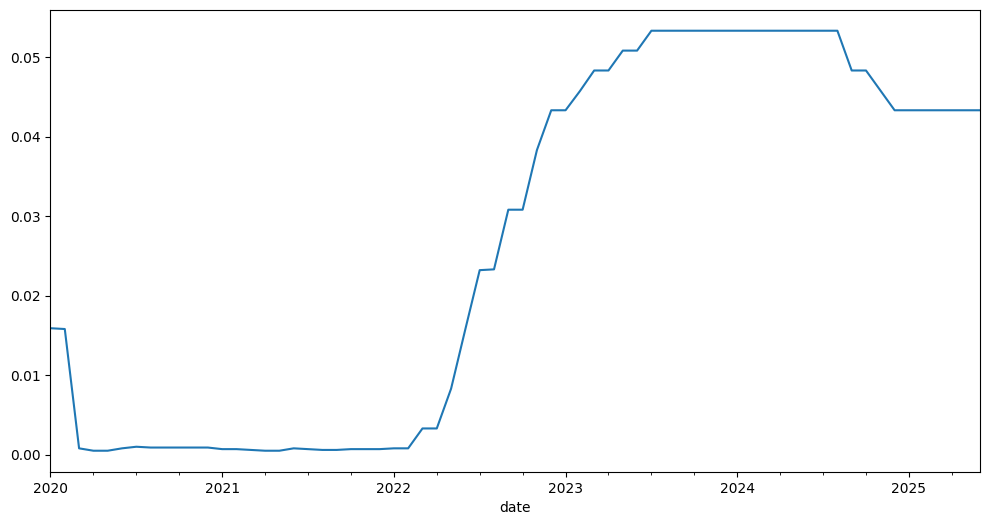

In [21]:
us_rate.values_monthly["2020":].plot();

There is daily time series also:

In [22]:
us_rate.values_daily.tail(10)  # last 10 days

date
2024-09-30    0.0483
2024-10-31    0.0483
2024-11-30    0.0458
2024-12-31    0.0433
2025-01-31    0.0433
2025-02-28    0.0433
2025-03-31    0.0433
2025-04-30    0.0433
2025-05-31    0.0433
2025-06-30    0.0433
Freq: D, Name: US_EFFR.RATE, dtype: float64

Descriptive rates statistics includes:
 - arithmetic mean
 - median
 - max and min values

In [23]:
us_rate.describe([10, 20])  # statistics for 10 and 20 years and full period

,property,period,US_EFFR.RATE
0,arithmetic mean,YTD,0.043300
1,median value,YTD,0.043300
2,max value,2025-01,0.043300
3,min value,2025-01,0.043300
4,arithmetic mean,10 years,0.019884
5,median,10 years,0.015550
6,max value,2023-07,0.053300
7,min value,2020-04,0.000500
8,arithmetic mean,20 years,0.017198
9,median,20 years,0.003100


Script example to plot key rate and inflation in the same chart.

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


def plot_infl_and_keyrate(
    infl: pd.DataFrame,
    rate: pd.DataFrame,
    first_date: str,
    last_date: str,
    figsize: list = [12, 6],
):

    fig, ax = plt.subplots(figsize=figsize)
    first_date_dt = pd.to_datetime(first_date)
    last_date_dt = pd.to_datetime(last_date)
    rate = rate.loc[first_date:last_date]
    if infl is not None:
        infl = infl.loc[first_date:last_date]
        ax.plot(infl.index.to_timestamp(), infl * 100, color="blue", linewidth=2, label="12-month inflation")
    ax.plot(rate.index.to_timestamp(), rate * 100, color="green", linewidth=2, label="Key rate")

    ax.set_xlim(first_date_dt, last_date_dt + pd.DateOffset(months=1))

    # set tickers format
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter("%Y")
    ax.xaxis.set_major_locator(years)
    ax.xaxis.set_major_formatter(years_fmt)

    ax.legend(loc="upper left")
    ax.set_ylabel("rate, %")

In [25]:
infl = ok.Inflation("USD.INFL").rolling_inflation
rates = ok.Rate("US_EFFR.RATE").values_monthly  # US Federal Reserve Effective Federal Funds Rate

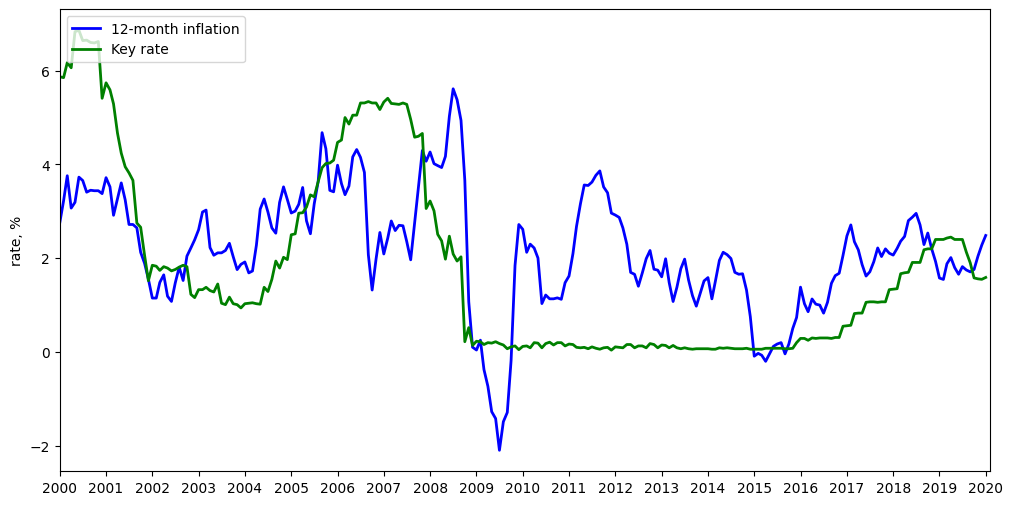

In [26]:
plot_infl_and_keyrate(infl=infl, rate=rates, first_date="2000-01", last_date="2020-01")

## Macro Indicators

Macroeconomic ratios can be found in `RATIO` namespace.

In [27]:
ok.symbols_in_namespace("RATIO")

,symbol,ticker,name,country,exchange,currency,type,isin
0,AUS_CAPE10.RATIO,AUS_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Australia,RATIO,,Macro Indicator,
1,BRA_CAPE10.RATIO,BRA_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Brazil,RATIO,,Macro Indicator,
2,CAN_CAPE10.RATIO,CAN_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Canada,RATIO,,Macro Indicator,
3,CHE_CAPE10.RATIO,CHE_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Switzerland,RATIO,,Macro Indicator,
4,CHN_CAPE10.RATIO,CHN_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,China,RATIO,,Macro Indicator,
5,DEU_CAPE10.RATIO,DEU_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Germany,RATIO,,Macro Indicator,
6,ESP_CAPE10.RATIO,ESP_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Spain,RATIO,,Macro Indicator,
7,EUR_CAPE10.RATIO,EUR_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,Europe,RATIO,,Macro Indicator,
8,FRA_CAPE10.RATIO,FRA_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,France,RATIO,,Macro Indicator,
9,GBR_CAPE10.RATIO,GBR_CAPE10,Cyclically adjusted price-to-earnings ratio CA...,UK,RATIO,,Macro Indicator,


### CAPE 10

CAPE 10 stands for cyclically adjusted price-to-earnings ratio. It's a macro indicator popularized by Robert J. Shiller.
Sometimes it's called Shiller P/E.

The ratio is used to gauge whether a market is undervalued or overvalued by comparing its current capitalization to its inflation-adjusted historical earnings record.

CAPE 10 is available for several countries through `Indicator` class.

In [28]:
cape = ok.Indicator("GBR_CAPE10.RATIO")  # CAPE 10 for UK market
cape

symbol                                            GBR_CAPE10.RATIO
name             Cyclically adjusted price-to-earnings ratio CA...
country                                                         UK
currency                                                          
type                                               Macro Indicator
first date                                                 1982-01
last date                                                  2025-04
period length                                   43 years, 4 months
dtype: object

Plot monthly CAPE10 historical data:

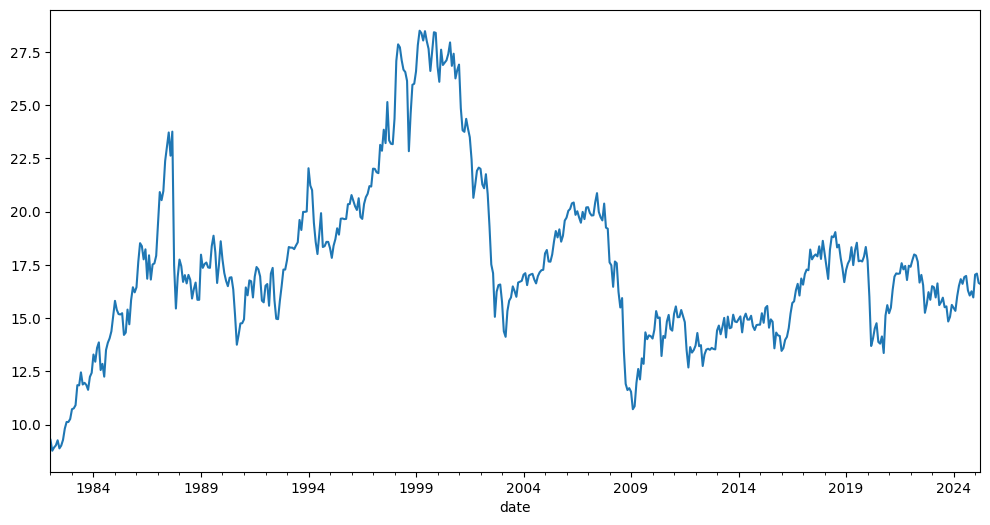

In [29]:
cape.values_monthly.plot();

It's possible to plot all (or several) CAPE 10 tickers in the same chart.

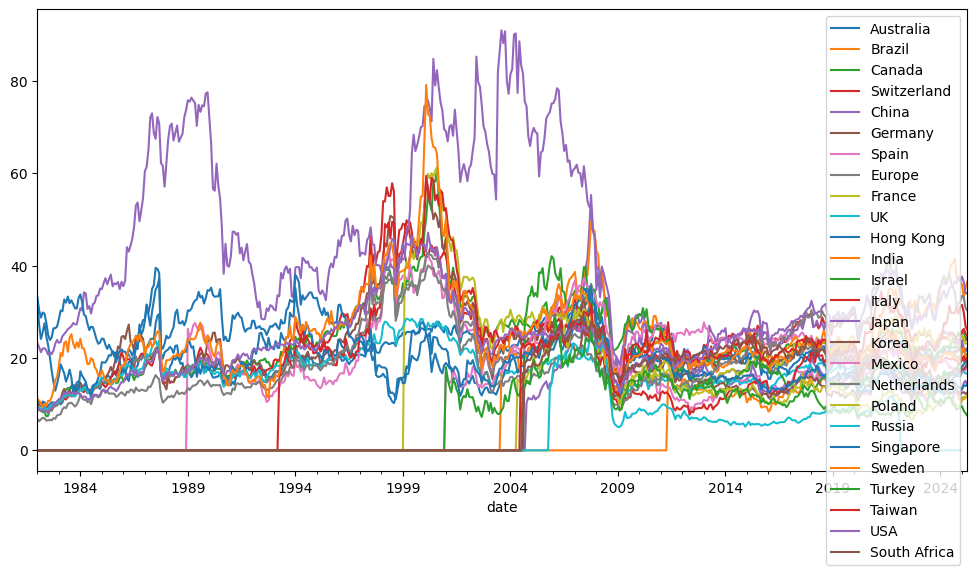

In [30]:
cape_symbols = ok.symbols_in_namespace("RATIO")["symbol"]
cape_objects = [ok.Indicator(cape) for cape in cape_symbols]
cape_df = pd.DataFrame({cape.country: cape.values_monthly for cape in cape_objects})
cape_df.plot();